In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc
from scipy.optimize import fmin_bfgs
import scipy.optimize as scp
#plt.style.use('ggplot')
plt.xkcd()

In [11]:
data = np.loadtxt('ex2data2.txt', delimiter=',', unpack=True)

# Initialize feature and label data
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

# lambda value
l = 1

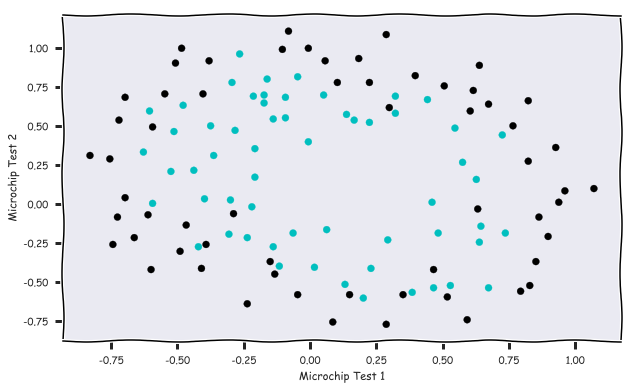

In [12]:
def plotData(X, y):
    plt.figure(figsize=(10, 6))
    
    colors = ['c' if i == 1 else 'k' for i in y]
    plt.scatter(X[:,0], X[:, 1], color=colors)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
# Plotting data
plotData(X, y)

In [13]:
# Mapping polynomial features
def mapFeature(X1, X2, degree):
    out = np.ones((len(np.asarray(X1) * np.ones(1)), 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            #print("[{}, {}]".format(i, j))
            out = np.concatenate((out,np.array(np.power(X1, i-j) * np.power(X2, j),copy=False,ndmin=2)), axis=1)
            #hstack
    return out

X1 = np.array(X[:, 0], ndmin=2).T
X2 = np.array(X[:, 1], ndmin=2).T

X_poly = mapFeature(X1, X2, 6)
theta_init = np.zeros((X_poly.shape[1], 1))

In [14]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def costFunctionReg(theta, X, y, l):
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    J = -1/m * (y.T @ np.log(hypothesis) + (1 - y).T @ np.log(1 - hypothesis)) + \
        l/(2*m) * theta[1:].T @ theta[1:]
    return J

def gradFunctionReg(theta, X, y, l):
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    filter = np.ones(theta.shape)
    filter[0] = 0
    grad = 1/m * (X.T @ (hypothesis - y)) + l/m * theta * filter    
    return grad

In [19]:
# Find minimum of regularized cost function

#result = minimize(costFunction, theta_init, args=(X, y), method=None, jac=False, options={ 'maxiter':400})
result = fmin_tnc(func=costFunctionReg, x0=theta_init, fprime=gradFunctionReg, args=(X_poly, y, l))
#result = scp.minimize(costFunctionReg, x0=theta_init, jac=False, args=(X_poly, y, l), options={'maxiter':400})

#theta = result['x']
theta = result[0]
print('Minimized theta: \n{}\n'.format(theta))

Minimized theta: 
[ 1.27271028  0.62529965  1.18111687 -2.01987402 -0.91743189 -1.4316693
  0.12393227 -0.36553118 -0.35725405 -0.17516293 -1.45817009 -0.05098417
 -0.61558559 -0.27469166 -1.19271299 -0.2421784  -0.20603303 -0.04466177
 -0.27778947 -0.29539513 -0.45645982 -1.04319154  0.02779374 -0.29244864
  0.01555759 -0.32742404 -0.14389149 -0.92467488]



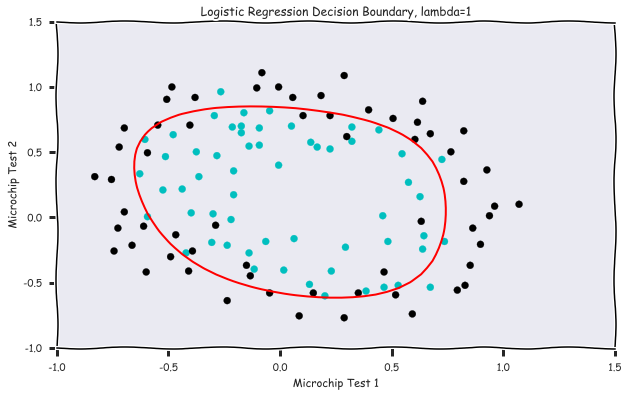

In [20]:
# Plotting decision boundary

def plotDecisionBoundary(theta, X, y):
    plotData(X, y)
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(0, len(u)):
        for j in range(0, len(v)):
            z[i, j] = mapFeature(u[i], v[j], 6) @ theta
    
    plt.contour(u, v, z.T, levels=[0], linewidth=2, colors='r')
    
plotDecisionBoundary(theta, X, y)
plt.title("Logistic Regression Decision Boundary, lambda={}".format(l))

In [21]:
# Determine accuracy on training set

def predict(theta, X):
    """Given a set of features X and theta, predict Y"""
    p = np.around(sigmoid(X @ theta))
    return p.reshape((len(p), 1))

# Accuracy of learning algorithm
p = predict(theta, X_poly)
accuracy = round(np.mean(p == y) * 100)
#accuracy = (sum(map(int, correct)) % len(correct)) 
print('lambda = {} \nAccuracy: {}'.format(l, accuracy))

lambda = 1 
Accuracy: 83.0
